In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# I- Affichage des données MNIST

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist["target"] = mnist["target"].astype(np.uint8)
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## 1- Utilisation de la méthode PCA

Taille des données originales :  (10000, 784)
Taille des données réduites :  (10000, 2)


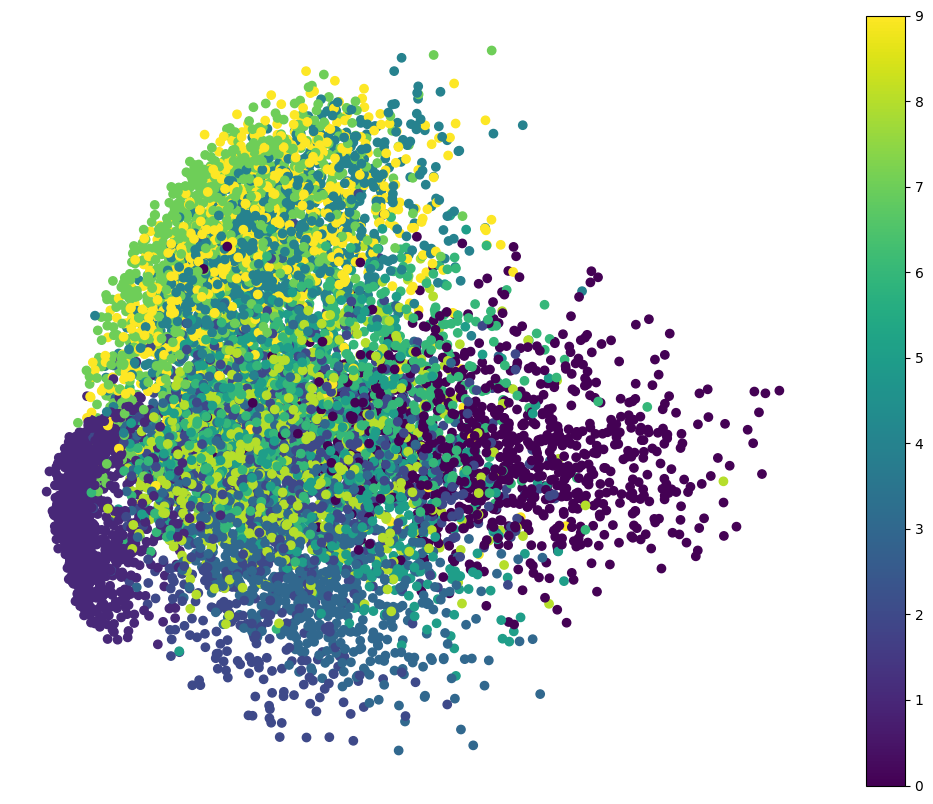

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 5. Appliquer la méthode PCA avec 2 composants
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 6. Afficher la taille des données originales et réduites
print("Taille des données originales : ", X.shape)
print("Taille des données réduites : ", X_reduced.shape)

# 7. Afficher les données réduites avec scatter plot
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.axis("off")
plt.colorbar()
plt.show()

# 8. Analyse du résultat d'affichage


Le résultat d'affichage montre la distribution des instances de MNIST dans l'espace réduit de deux dimensions. Les différents chiffres (0 à 9) sont répartis de manière assez distincte les uns des autres, mais il y a aussi une certaine superposition entre certains chiffres, notamment entre 4 et 9, ou encore entre 3, 5 et 8. Cela suggère qu'il pourrait être difficile de séparer certains chiffres avec un classificateur linéaire, mais qu'un classificateur non-linéaire pourrait potentiellement mieux faire.

## 2- Utilisation de la méthode t-SNE

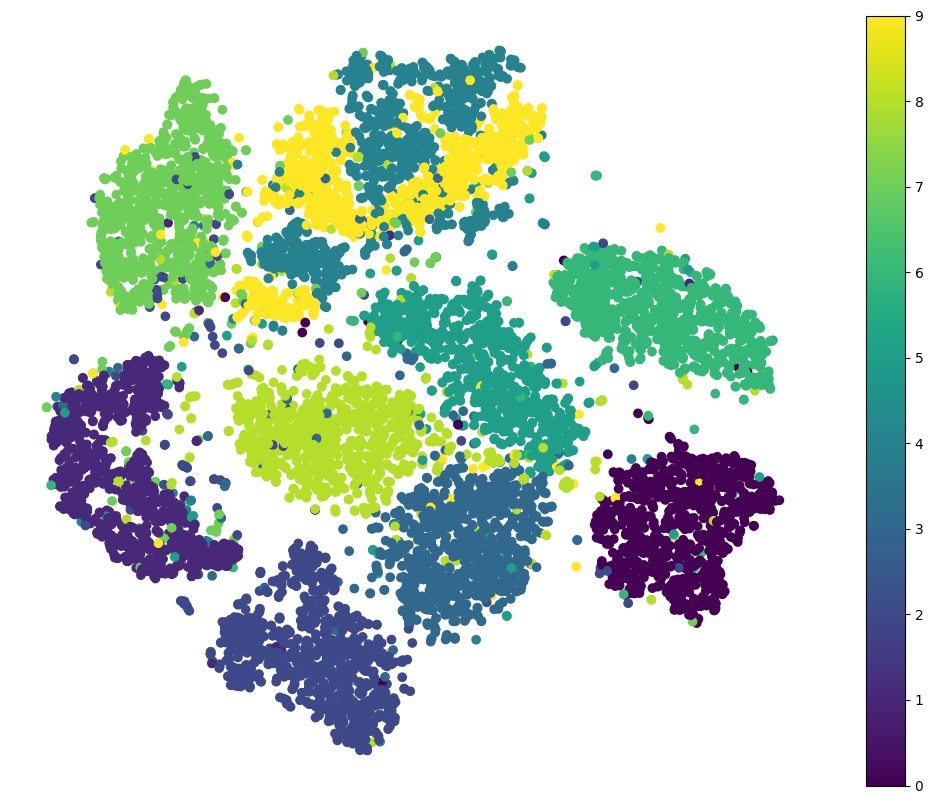

In [4]:
from sklearn.manifold import TSNE

# 10. Appliquer la méthode t-SNE avec 2 composants
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

# 11. Afficher les données réduites avec scatter plot
plt.figure(figsize=(13,10))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y)
plt.axis("off")
plt.colorbar()
plt.show()

12. Analyse des chevauchements
On observe des chevauchements entre 4 et 9, ainsi qu'entre 3, 5 et 8.

13. Comparaison des résultats d'affichage
La méthode t-SNE semble mieux séparer les différentes classes de chiffres que la méthode PCA, en particulier en réduisant les chevauchements entre certains chiffres. Cependant, t-SNE est également plus coûteux en termes de temps de calcul que PCA.

# II- PCA sur les données MNIST

## 1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données

In [5]:
#16
X_train = mnist["data"][:60000]
y_train = mnist["target"][:60000]
X_test = mnist["data"][60000:]
y_test = mnist["target"][60000:]


In [6]:
#17-a
import time

start_time = time.time()
print(start_time)


1685606004.952924


In [7]:
#17-b
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instanciation du modèle
rf = RandomForestClassifier(n_estimators=100)

# Entraînement du modèle
rf.fit(X_train, y_train)

end_time = time.time()
print(end_time)


1685606052.6349719


In [8]:
#17-c
elapsed_time = end_time - start_time
print("Le temps d'exécution nécessaire pour l'apprentissage est de {:.2f} secondes".format(elapsed_time))


Le temps d'exécution nécessaire pour l'apprentissage est de 47.68 secondes


In [9]:
#17-d-i
y_pred = rf.predict(X_test)


In [10]:
#17-d-ii
acc = accuracy_score(y_test, y_pred)
print("Le taux de classification est de {:.2f}%".format(acc*100))


Le taux de classification est de 96.93%


## 2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

In [11]:
from sklearn.decomposition import PCA

# Appliquer PCA sur la base d'apprentissage
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)


In [12]:
# Appliquer la méthode PCA sur la base d'apprentissage avec une variance ratio de 95%
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

# Entraîner un modèle RandomForest sur les données d'apprentissage réduites
start_time = time.time() # Mesurer le temps avant l'apprentissage
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced, y_train)
end_time = time.time() # Mesurer le temps après l'apprentissage

# Calculer le temps d'exécution nécessaire pour l'apprentissage
training_time = end_time - start_time
print("Temps d'apprentissage avec PCA : {:.2f} secondes".format(training_time))


Temps d'apprentissage avec PCA : 130.29 secondes


In [13]:
# Appliquer la méthode PCA sur la base de test avec une variance ratio de 95%
X_test_reduced = pca.transform(X_test)


In [14]:
# Prédire les classes de la base de test réduite
y_pred = rf.predict(X_test_reduced)

# Calculer le taux de classification
acc = accuracy_score(y_test, y_pred)
print("Le taux de classification avec PCA est de {:.2f}%".format(acc*100))


Le taux de classification avec PCA est de 94.68%


## 3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

In [15]:
from sklearn.linear_model import LogisticRegression
import time

# Instancier la classe LogisticRegression
lr = LogisticRegression()

# Enregistrer le temps de début d'apprentissage
start_time = time.time()

# Ajuster le modèle aux données d'apprentissage
lr.fit(X_train, y_train)

# Enregistrer le temps d'apprentissage
training_time = time.time() - start_time
print("Le temps d'apprentissage est de {:.2f} secondes".format(training_time))

# Prédire les classes de la base de test
y_pred = lr.predict(X_test)

# Calculer le taux de classification
acc = accuracy_score(y_test, y_pred)
print("Le taux de classification est de {:.2f}%".format(acc*100))


Le temps d'apprentissage est de 39.26 secondes
Le taux de classification est de 92.55%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

In [16]:
from sklearn.linear_model import LogisticRegression
import time

# Instancier un objet LogisticRegression
lr = LogisticRegression(random_state=42)

# Appliquer PCA sur les données d'apprentissage
X_train_reduced = pca.transform(X_train)

# Lancer l'apprentissage et calculer le temps d'exécution
start_time = time.time()
lr.fit(X_train_reduced, y_train)
end_time = time.time()
training_time_pca = end_time - start_time
print("Le temps d'apprentissage avec PCA est de {:.2f} secondes".format(training_time_pca))


Le temps d'apprentissage avec PCA est de 11.25 secondes


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Appliquer PCA sur la base de test
X_test_reduced = pca.transform(X_test)


In [18]:
# Prédire les classes de la base de test réduite
y_pred = lr.predict(X_test_reduced)

# Calculer le taux de classification
acc = accuracy_score(y_test, y_pred)
print("Le taux de classification avec PCA est de {:.2f}%".format(acc*100))


Le taux de classification avec PCA est de 92.01%
